# Simulation analysis of "simplified connectome models"

<u>Circuits (O1 size, calibrated)</u>:
- Base circuit
- 1st-order hex0-EE rewired
- 2nd-order hex0-EE rewired
- 3rd-order hex0-EE rewired
- 4th-order hex0-EE rewired
- 5th-order hex0-EE rewired

<u>Simulation campaigns</u>:
- Random dot stimulus TEST (2s)

(Modified from [bernsteinconference2022/simulations_summary.ipynb](https://bbpgitlab.epfl.ch/conn/personal/pokorny/bernsteinconference2022/-/blob/main/simulations_summary.ipynb))

In [1]:
# Initialization
import numpy as np
import os
from datetime import datetime
from utils import extract_spikes, extract_rates, extract_single_cell_rates, compute_cell_rate_significance, extract_psths, extract_psths_per_layer, extract_psths_per_pattern
from utils import plot_spikes_per_layer, plot_per_layer, plot_cell_rate_histograms, plot_psths, plot_psths_per_layer, plot_psths_per_pattern

ORDINAL_DICT = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}


In [2]:
# Figs path
# res_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim100__CALIB1'
# res_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim100__CALIB2'
res_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1'
# res_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB2'
# res_path = '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim500__CALIB1'
figs_path = os.path.join(res_path, 'figures_' + datetime.now().strftime('%Y%m%d'))
if not os.path.exists(res_path):
    os.makedirs(res_path)
if not os.path.exists(figs_path):
    os.makedirs(figs_path)
print(f'INFO: Results path: "{res_path}"')
print(f'INFO: Figs path: "{figs_path}"')

INFO: Results path: "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1"
INFO: Figs path: "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1/figures_20230908"


In [3]:
# # Simulation paths
# sim_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2'
# sim_seed = 628462

# order = [] #[1, 2, 3, 4, 5]
# circuit_names = ['SSCx-HexO1-Release-TC'] + [f'SSCx-HexO1-Release-TC__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
# plot_names = ['Original'] + [f'{ORDINAL_DICT[_ord]} order' for _ord in order]
# sim_names_spont = ['SSCx-HexO1-Release-TC__Spont'] + [f'SSCx-HexO1-Release-TC__Spont__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
# sim_names_evoked = ['SSCx-HexO1-Release-TC__Evoked'] + [f'SSCx-HexO1-Release-TC__Evoked__ConnRewireOrder{_ord}Hex0EE' for _ord in order]
# sim_configs_spont = {_c: os.path.join(sim_path, _sim, f'seed={sim_seed}', 'simulation_config.json') for _c, _sim in zip(circuit_names, sim_names_spont)}  # SONATA simulation config
# sim_configs_evoked = {_c: os.path.join(sim_path, _sim, f'seed={sim_seed}', 'simulation_config.json') for _c, _sim in zip(circuit_names, sim_names_evoked)}  # SONATA simulation config

# print('Spont sims:')
# for _sim, _cfg in sim_configs_spont.items():
#     assert os.path.exists(_cfg)
#     print(f'  {_sim}')

# t_stim = None
# print('Evoked sims:')
# for _sim, _cfg in sim_configs_evoked.items():
#     assert os.path.exists(_cfg)
#     _stim_file = os.path.join(os.path.split(_cfg)[0], 'stim_times.txt')
#     assert os.path.exists(_stim_file)
#     if t_stim is None:
#         t_stim = np.loadtxt(_stim_file)
#     else:
#         np.testing.assert_array_equal(t_stim, np.loadtxt(_stim_file), 'ERROR: Stimulus time mismatch!')
#     print(f'  {_sim} ({len(t_stim)} stimuli)')


In [3]:
# circuit_names = ['SSCx-HexO1-Release-TC']
# plot_names = ['Original']
# sim_names = ['TEST']
# sim_configs = {circuit_names[0]: '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/bbp_workflow_v2/6b56f5a8-d504-4739-991b-3bfd23295f2c/0/simulation_config.json'}

In [5]:
# # rate_max = [10.0, 15.0, 20.0]  # 5.0 MISSING
# rate_max = [15.0, 20.0, 25.0, 30.0]
# circuit_names = [f'rmax{_r}'.replace('.', 'p') for _r in rate_max]
# plot_names = [f'rmax{_r}'.replace('.', 'p') for _r in rate_max]
# # sim_configs = {_c: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__DotStim100__CALIB1/seed=628462/rate_max={_r}/simulation_config.json' for _c, _r in zip(circuit_names, rate_max)}
# sim_configs = {_c: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__DotStim200__CALIB1/seed=628462/rate_max={_r}/simulation_config.json' for _c, _r in zip(circuit_names, rate_max)}

In [7]:
# # rate_min = [0.5, 1.0]  # 0.0 MISSING
# rate_min = [0.5]  # 0.0, 1.0 MISSING
# circuit_names = [f'rmin{_r}'.replace('.', 'p') for _r in rate_min]
# plot_names = [f'rmin{_r}'.replace('.', 'p') for _r in rate_min]
# # sim_configs = {_c: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__DotStim100__CALIB2/seed=628462/rate_min={_r}/simulation_config.json' for _c, _r in zip(circuit_names, rate_min)}
# sim_configs = {_c: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__DotStim200__CALIB2/seed=628462/rate_min={_r}/simulation_config.json' for _c, _r in zip(circuit_names, rate_min)}

In [189]:
seed = 628462
rate_min = [0.0, 0.1, 0.5]
rate_max = [25.0, 50.0, 75.0, 100.0]
rate_min_max = [[_rmn, _rmx] for _rmn in rate_min for _rmx in rate_max]

circuit_names = [f'r_{_rmn}_{_rmx}'.replace('.', 'p') for _rmn, _rmx in rate_min_max]
plot_names = circuit_names
sim_configs = {_c: f'/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/SimplifiedConnectomeModels/simulations_v2/SSCx-HexO1-Release-TC__DotStim500__CALIB1/seed={seed}/rate_min={_rmn}/rate_max={_rmx}/simulation_config.json' for _c, (_rmn, _rmx) in zip(circuit_names, rate_min_max)}

### Stimulus-evoked activity (random dot stim TEST)

In [5]:
t_start = 2000 # (ms)
# t_end = 4500 # (ms)
t_end = 12000 # (ms)
node_set = 'hex0'
load_if_existing = True

spikes_dict = extract_spikes(circuit_names, sim_configs, node_set=node_set, save_path=res_path, save_name='spikes_TEST', load_if_existing=load_if_existing)
rates_dict = extract_rates(circuit_names, sim_configs, node_set=node_set, t_start=t_start, t_end=t_end, save_path=res_path, save_name='rates_TEST', load_if_existing=load_if_existing)
cell_rates_dict = extract_single_cell_rates(circuit_names, sim_configs, node_set=node_set, t_start=t_start, t_end=t_end, save_path=res_path, save_name='cell_rates_TEST', load_if_existing=load_if_existing)

cell_rates_pval_dict = compute_cell_rate_significance(circuit_names, sim_configs, cell_rates_dict['spk_rates'], node_set, save_path=res_path, save_name='cell_rates_TEST_pval', load_if_existing=load_if_existing)
np.testing.assert_array_almost_equal(rates_dict['rates_exc_per_layer'], cell_rates_pval_dict['mean_exc_rates_per_layer'])  # Consistency check
np.testing.assert_array_almost_equal(rates_dict['rates_inh_per_layer'], cell_rates_pval_dict['mean_inh_rates_per_layer'])  # Consistency check


INFO: Spike data loaded from "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1/spikes_TEST_hex0.npz"
INFO: Rate data loaded from "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1/rates_TEST_hex0.npz"
INFO: Cell rate data loaded from "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1/cell_rates_TEST_hex0.npz"
INFO: Cell rate p-values loaded from "/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/analyses_v2/sim_analysis_DotStim200__CALIB1/cell_rates_TEST_pval_hex0.npz"


In [6]:
from bluepysnap import Simulation
import json
sim = Simulation(sim_configs[circuit_names[0]])
spike_file = sim.config['inputs']['Stimulus_spikeReplay']['spike_file']
stim_cfg_file = os.path.splitext(spike_file)[0] + '.json'
with open(stim_cfg_file, 'r') as f:
    stim_cfg = json.load(f)
t_stim = np.array(stim_cfg['props']['time_windows'][:-1])
stim_train = np.array(stim_cfg['props']['stim_train'])
print(f'STIM TIMES: {t_stim} ms')
print(f'STIM TRAIN: {stim_train}')

STIM TIMES: [2000. 2500. 3000. 3500. 4000.] ms
STIM TRAIN: [0 0 0 0 0]


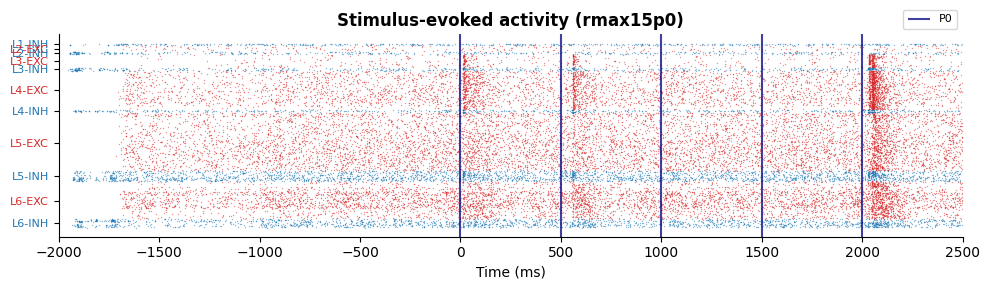

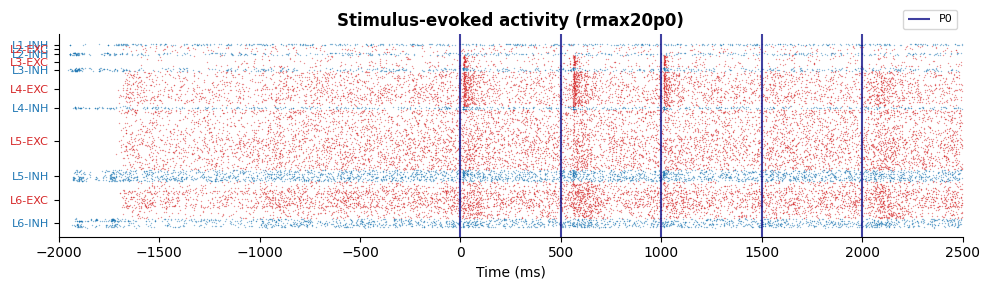

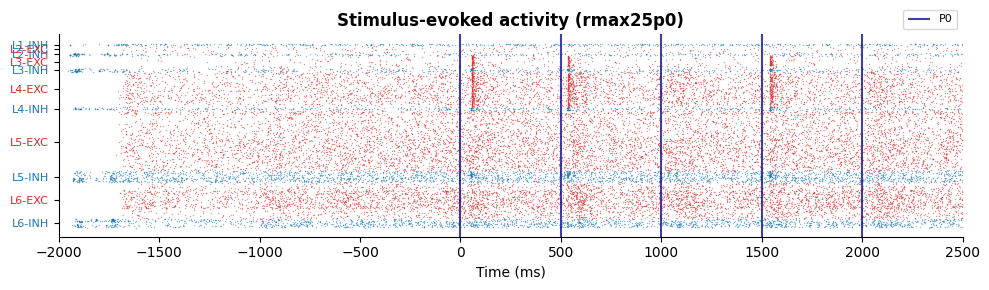

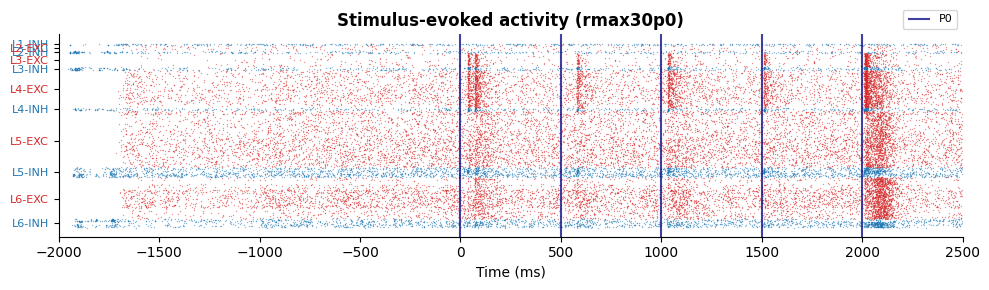

In [8]:
# Plot spike trains of all stimuli
t_start = -2000  # Rel. to t_zero (ms)
t_end = 10000  # Rel. to t_zero (ms)
t_zero = 2000  # Zero-offset (ms)

plot_spikes_per_layer(plot_names, spikes_dict['spk_exc_per_layer'], spikes_dict['spk_inh_per_layer'], t_start, t_end, t_zero, t_stim=t_stim, stim_train=stim_train, figsize=(10, 3), save_path=figs_path)

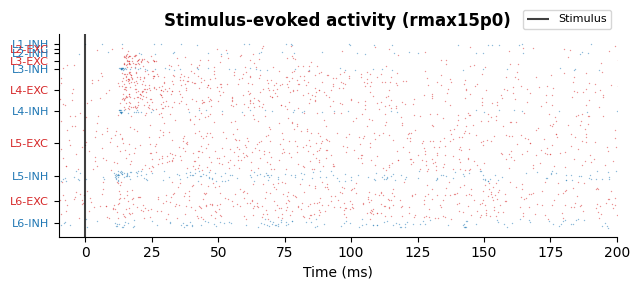

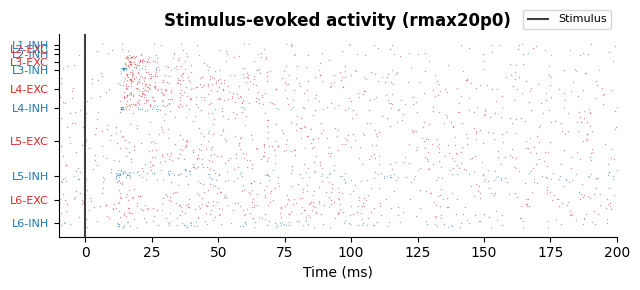

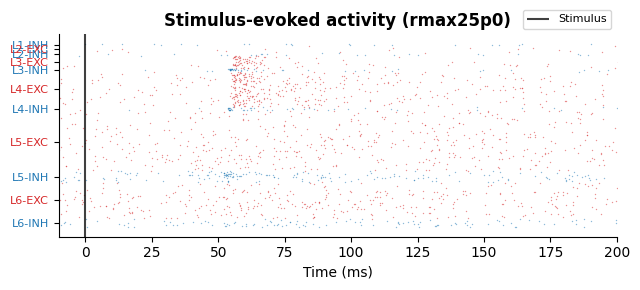

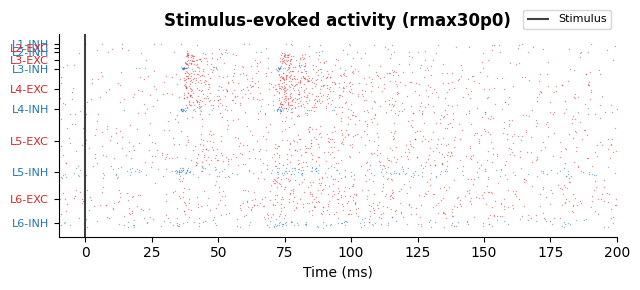

In [9]:
# Plot spike trains of first stimulus
t_start = -10 # (ms)
t_end = 200 # (ms)
t_zero = 2000

plot_spikes_per_layer(plot_names, spikes_dict['spk_exc_per_layer'], spikes_dict['spk_inh_per_layer'], t_start, t_end, t_zero, t_stim=t_stim, figsize=(6.5, 3), save_path=figs_path)

/gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/sscx-analysis/simplified_connectome_models/notebooks/utils.py:433: RuntimeWarning: divide by zero encountered in divide
  alpha_levels_corr = alpha_levels / num_tests # Bonferroni correction for multiple comparisons


ALPHA LEVELS: *...0.01 **...0.001 ***...0.0001 

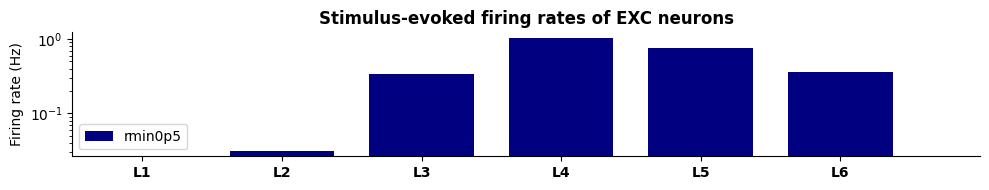

ALPHA LEVELS: *...0.01 **...0.001 ***...0.0001 

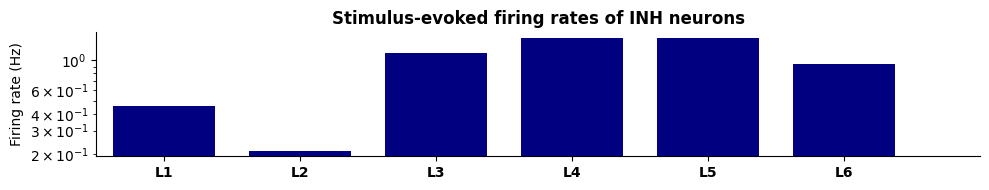

In [13]:
# Plot firing rates per layer
plot_per_layer(rates_dict['rates_exc_per_layer'], plot_names, 'Firing rate (Hz)', f'Stimulus-evoked firing rates of EXC neurons', pvals=cell_rates_pval_dict['p_rates_exc'], log_y=True, figsize=(10, 2), show_legend=True, save_path=figs_path)
plot_per_layer(rates_dict['rates_inh_per_layer'], plot_names, 'Firing rate (Hz)', f'Stimulus-evoked firing rates of INH neurons', pvals=cell_rates_pval_dict['p_rates_inh'], log_y=True, figsize=(10, 2), show_legend=False, save_path=figs_path)

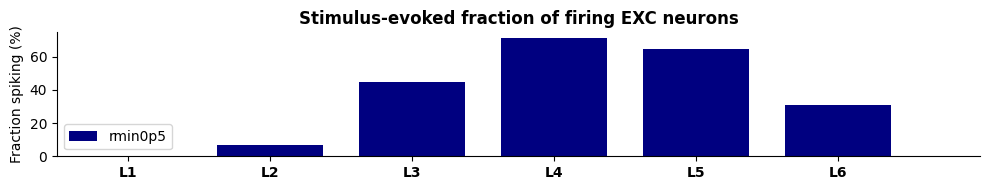

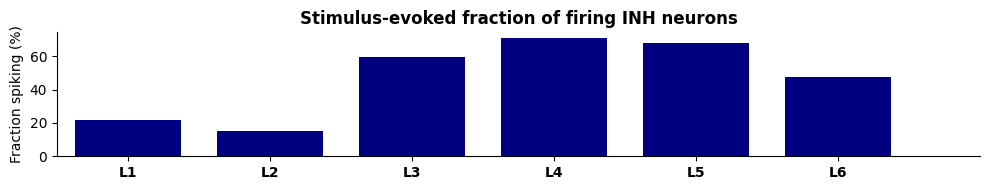

In [14]:
# Plot spiking cell fraction per layer
plot_per_layer(rates_dict['pct_exc_spiking_per_layer'], plot_names, 'Fraction spiking (%)', f'Stimulus-evoked fraction of firing EXC neurons', log_y=False, figsize=(10, 2), show_legend=True, save_path=figs_path)
plot_per_layer(rates_dict['pct_inh_spiking_per_layer'], plot_names, 'Fraction spiking (%)', f'Stimulus-evoked fraction of firing INH neurons', log_y=False, figsize=(10, 2), show_legend=False, save_path=figs_path)

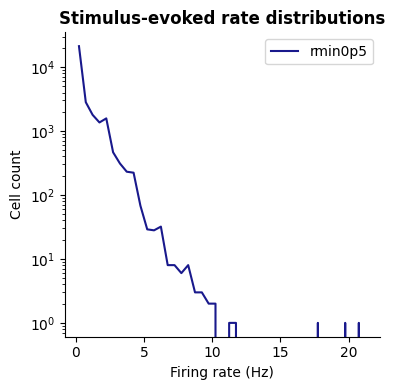

In [15]:
# Plot single-cell rate histograms
plot_cell_rate_histograms(cell_rates_dict['spk_rates'], plot_names, sim_type='Stimulus-evoked', save_path=figs_path)

In [11]:
# Compute & plot PSTHs
t_psth = [0, 200]
bin_size = 2  # (ms)
psths_exc, psths_inh, psth_bins = extract_psths(spikes_dict['spk_exc'], spikes_dict['spk_inh'], t_stim, t_psth, bin_size)
psths_exc_per_layer, psths_inh_per_layer, _ = extract_psths_per_layer(spikes_dict['spk_exc_per_layer'], spikes_dict['spk_inh_per_layer'], t_stim, t_psth, bin_size)
pattern_psths_exc, pattern_psths_inh, _ = extract_psths_per_pattern(spikes_dict['spk_exc'], spikes_dict['spk_inh'], t_stim, stim_train, t_psth, bin_size)

/gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/sscx-analysis/simplified_connectome_models/notebooks/utils.py:329: RuntimeWarning: invalid value encountered in divide
  psth_exc = 1e3 * np.histogram(stim_spikes_exc.index, bins=bins)[0] / (bin_size * n_exc * len(t_stim))
/gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/sscx-analysis/simplified_connectome_models/notebooks/utils.py:329: RuntimeWarning: invalid value encountered in divide
  psth_exc = 1e3 * np.histogram(stim_spikes_exc.index, bins=bins)[0] / (bin_size * n_exc * len(t_stim))
/gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/sscx-analysis/simplified_connectome_models/notebooks/utils.py:329: RuntimeWarning: invalid value encountered in divide
  psth_exc = 1e3 * np.histogram(stim_spikes_exc.index, bins=bins)[0] / (bin_size * n_exc * len(t_stim))
/gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/sscx-analysis/simplified_connectome_models/notebooks/utils.py:329: RuntimeWarning: invalid value encountered in divide
  psth_exc = 1e3 * np.histog

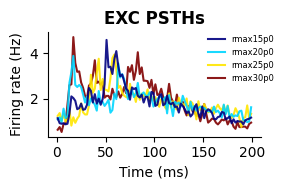

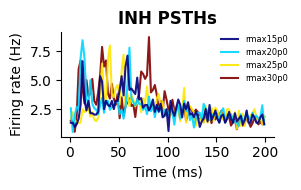

In [12]:
plot_psths(psths_exc, psth_bins, plot_names, 'EXC', figsize=(3, 2), save_path=figs_path, lgd_props={'loc': 'upper right', 'ncols': 1, 'fontsize': 6, 'bbox_to_anchor': [1.1, 1.05], 'frameon': False})
plot_psths(psths_inh, psth_bins, plot_names, 'INH', figsize=(3, 2), save_path=figs_path, lgd_props={'loc': 'upper right', 'ncols': 1, 'fontsize': 6, 'bbox_to_anchor': [1.1, 1.05], 'frameon': False})

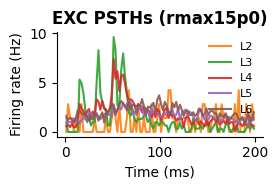

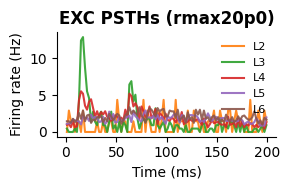

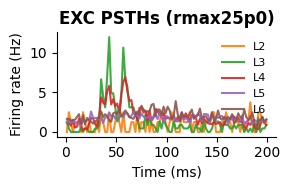

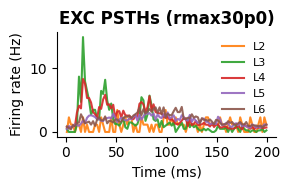

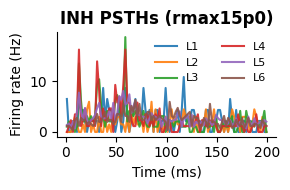

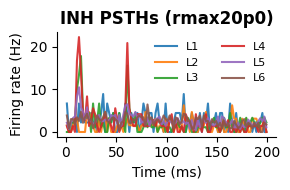

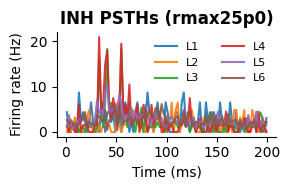

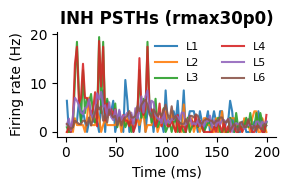

In [13]:
plot_psths_per_layer(psths_exc_per_layer, psth_bins, plot_names, 'EXC', figsize=(3, 2), save_path=figs_path, show_legend=True, lgd_props={'loc': 'upper right', 'ncols': 1, 'fontsize': 8, 'frameon': False})
plot_psths_per_layer(psths_inh_per_layer, psth_bins, plot_names, 'INH', figsize=(3, 2), save_path=figs_path, show_legend=True, lgd_props={'loc': 'upper right', 'ncols': 2, 'fontsize': 8, 'frameon': False})

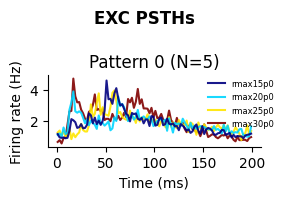

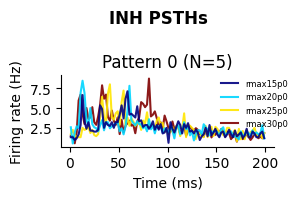

In [17]:
plot_psths_per_pattern(pattern_psths_exc, psth_bins, plot_names, 'EXC', stim_train, figsize=(3, 2), save_path=figs_path, lgd_props={'loc': 'upper right', 'ncols': 1, 'fontsize': 6, 'bbox_to_anchor': [1.1, 1.05], 'frameon': False})
plot_psths_per_pattern(pattern_psths_inh, psth_bins, plot_names, 'INH', stim_train, figsize=(3, 2), save_path=figs_path, lgd_props={'loc': 'upper right', 'ncols': 1, 'fontsize': 6, 'bbox_to_anchor': [1.1, 1.05], 'frameon': False})

In [ ]:
# Trim PNGs
# mogrify -trim *.png